# PRESELECCIÓN DE VARIABLES

## IMPORTAR PAQUETES

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance


#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [8]:
ruta_proyecto =  'C:/Users/Ana/Desktop/DATA_SCIENCE_FOR_BUSINESS/PYTHON_DATA_SCIENCE_MASTERY/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS_/01_LEADSCORING'

Nombres de los ficheros de datos.

In [9]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [10]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

In [11]:
df

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
id,,,,,,,,,,,,,,,,,,,,,
660727,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.04,0.674296,0.12500,0.7,1.000000,1
660719,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.02,0.134243,0.06250,0.6,0.666667,0
660681,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.04,0.628521,0.06250,0.8,0.777778,1
660680,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.00,0.000000,0.00000,1.0,0.444444,0
660673,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.04,0.721831,0.12500,0.7,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579622,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.26,0.620158,0.16250,0.7,0.666667,1
579615,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.10,0.092430,0.15625,0.7,1.000000,1
579546,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.04,0.104754,0.12500,0.7,0.888889,0


## MÉTODOS SUPERVISADOS

### Preparar x e y

In [12]:
target = 'compra'
x = df.drop(columns = target).copy()
y =  df[target].copy()

### Mutual Information

#### Crear una función para mostrar el resultado

In [13]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

#### Calcular y revisar

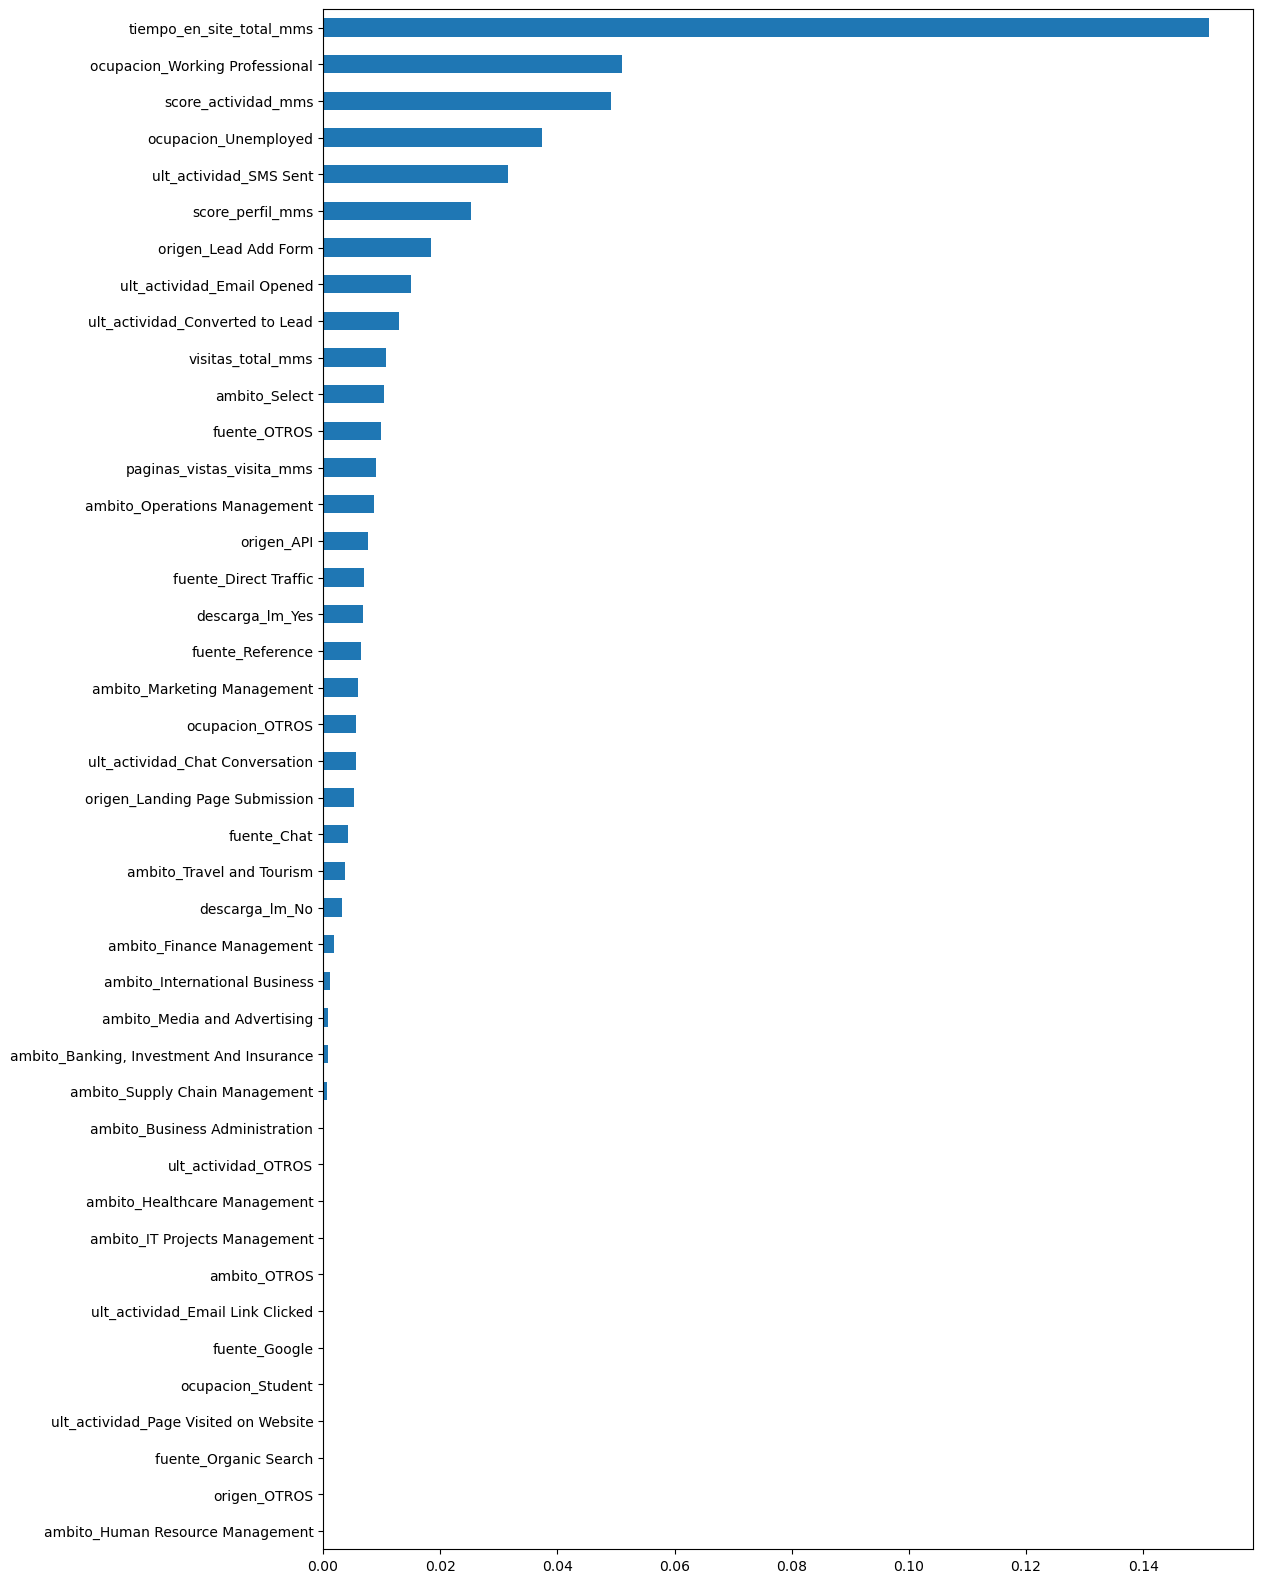

In [14]:
mutual_selector = mutual_info_classif(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [15]:
posicion_variable_limite = 17

##### Extraer los nombres de las que entran

In [16]:
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

In [17]:
entran_mi

38           tiempo_en_site_total_mms
34     ocupacion_Working Professional
40                score_actividad_mms
33               ocupacion_Unemployed
16             ult_actividad_SMS Sent
41                   score_perfil_mms
2                origen_Lead Add Form
13         ult_actividad_Email Opened
11    ult_actividad_Converted to Lead
37                  visitas_total_mms
28                      ambito_Select
7                        fuente_OTROS
39          paginas_vistas_visita_mms
27       ambito_Operations Management
0                          origen_API
5               fuente_Direct Traffic
36                    descarga_lm_Yes
Name: variable, dtype: object

##### Crear el dataframe con la selección

In [18]:
x_mi = x[entran_mi].copy()

### Recursive Feature Elimination

#### Instanciar

In [19]:
rfe = RFE(estimator = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc'))

C:\Users\Ana\miniconda3\envs\base1\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


#### Entrenar

In [20]:
rfe.fit(x,y)

C:\Users\Ana\miniconda3\envs\base1\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Ana\miniconda3\envs\base1\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Ana\miniconda3\envs\base1\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Ana\miniconda3\envs\base1\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Ana\miniconda3\envs\base1\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecate

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='auc',
                            feature_types=None, gamma=None, gpu_id=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=-1, num_parallel_tree=None, predictor=None,
                            random_state=None, ...))

##### Extraer los nombres de las que entran

In [21]:
entran_rfe = x.columns[rfe.support_]

In [22]:
entran_rfe

Index(['origen_Landing Page Submission', 'origen_Lead Add Form',
       'fuente_Direct Traffic', 'ult_actividad_Chat Conversation',
       'ult_actividad_Converted to Lead', 'ult_actividad_OTROS',
       'ult_actividad_Page Visited on Website', 'ult_actividad_SMS Sent',
       'ambito_Healthcare Management', 'ambito_Marketing Management',
       'ambito_Media and Advertising', 'ambito_Operations Management',
       'ambito_Select', 'ocupacion_Unemployed',
       'ocupacion_Working Professional', 'descarga_lm_No', 'visitas_total_mms',
       'tiempo_en_site_total_mms', 'paginas_vistas_visita_mms',
       'score_actividad_mms', 'score_perfil_mms'],
      dtype='object')

#### Crear el dataframe con la selección

In [23]:
x_rfe = x[entran_rfe].copy()

### Permutation Importance

#### Crear una función para mostrar el resultado

In [24]:
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### Instanciar y entrenar

In [25]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBClassifier(use_label_encoder=False, n_jobs = -1, eval_metric='auc')

xgb.fit(x,y)

permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'roc_auc',
                                     n_repeats=5, n_jobs = -1)

C:\Users\Ana\miniconda3\envs\base1\envs\leadscoring\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


#### Revisar la salida

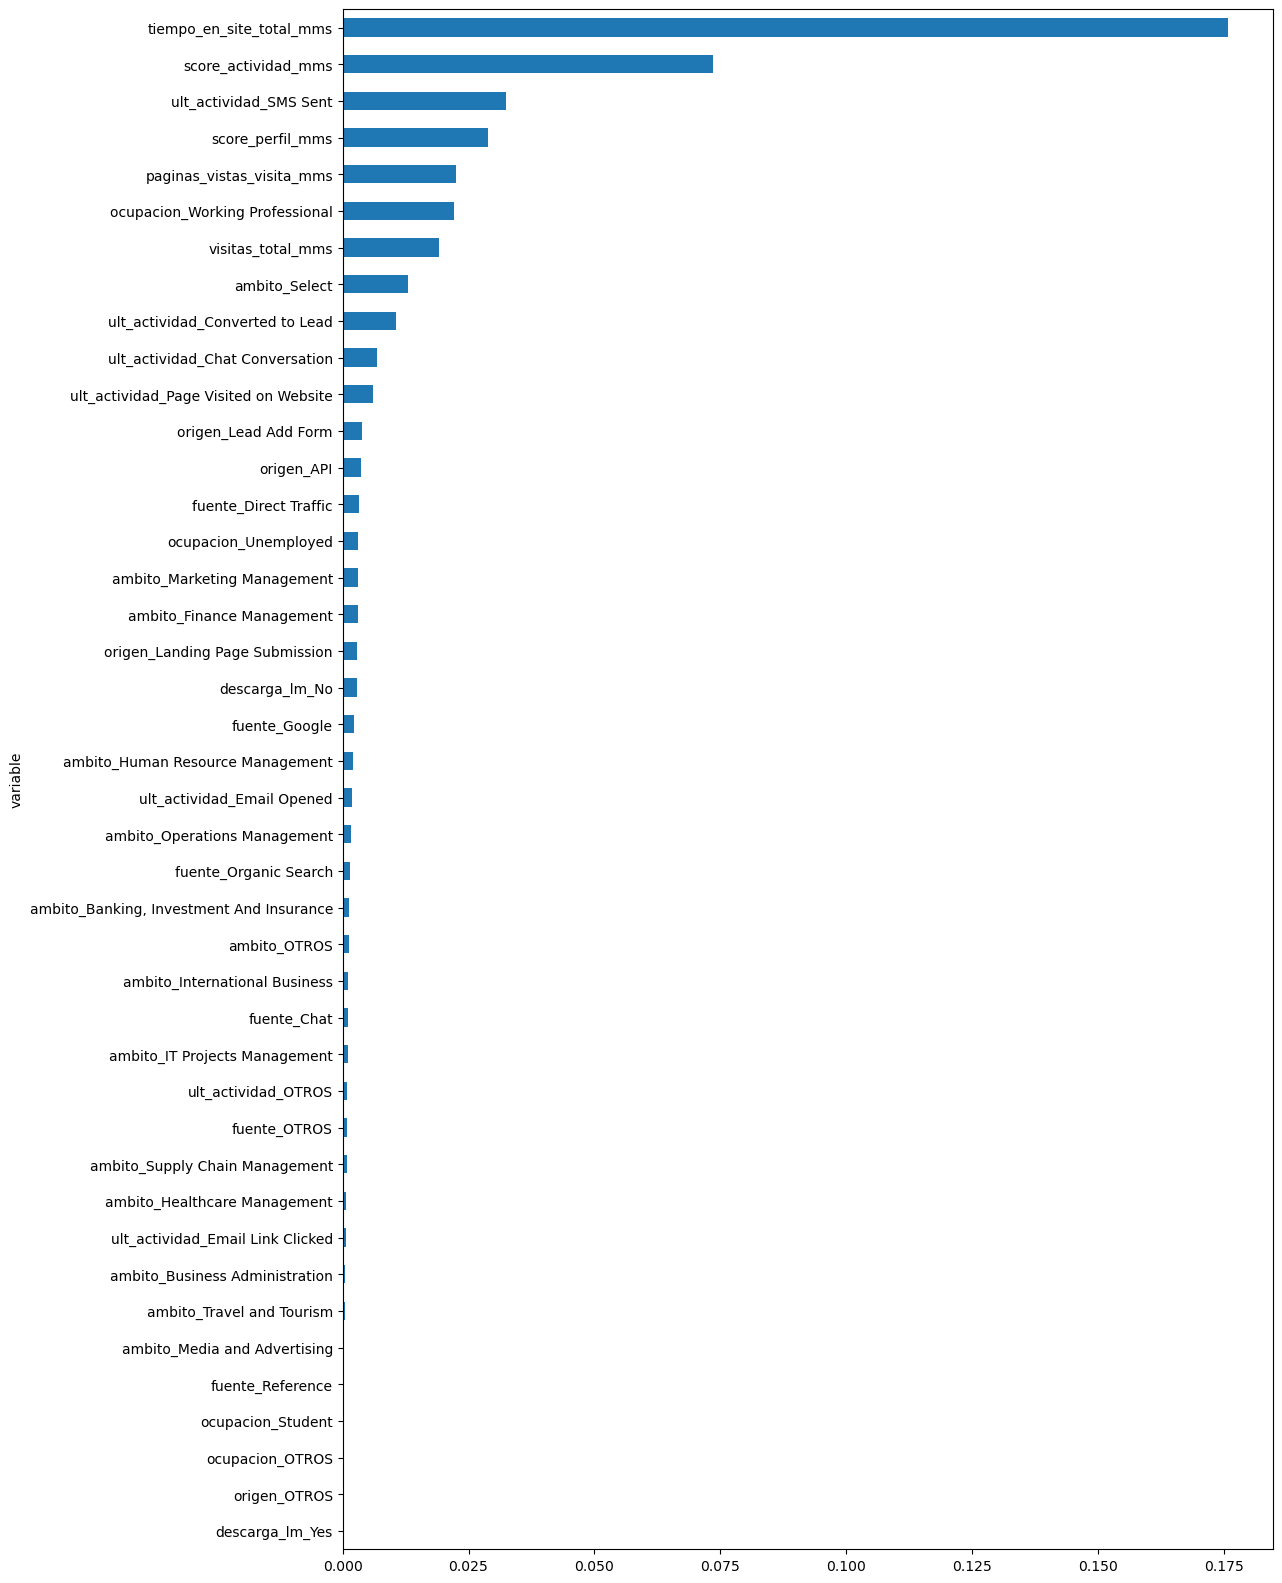

In [26]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,20));

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [30]:
posicion_variable_limite = 19

##### Extraer los nombres de las que entran

In [31]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

In [32]:
entran_per

38                 tiempo_en_site_total_mms
40                      score_actividad_mms
16                   ult_actividad_SMS Sent
41                         score_perfil_mms
39                paginas_vistas_visita_mms
34           ocupacion_Working Professional
37                        visitas_total_mms
28                            ambito_Select
11          ult_actividad_Converted to Lead
10          ult_actividad_Chat Conversation
15    ult_actividad_Page Visited on Website
2                      origen_Lead Add Form
0                                origen_API
5                     fuente_Direct Traffic
33                     ocupacion_Unemployed
24              ambito_Marketing Management
19                ambito_Finance Management
1            origen_Landing Page Submission
35                           descarga_lm_No
Name: variable, dtype: object

##### Crear el dataframe con la selección

In [33]:
x_per = x[entran_per].copy()

## SELECCIONAR EL MÉTODO FINAL

Descomentar el método de preselección elegido y dejar comentados el resto.

In [34]:
#x_preseleccionado = x_mi
# x_preseleccionado = x_rfe
x_preseleccionado = x_per

## MÉTODOS NO SUPERVISADOS

### Correlación

#### Crear una función para mostrar el resultado

In [35]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

#### Calcular y revisar

##### Calcular

In [36]:
cor_finales = correlaciones_fuertes(x_preseleccionado)

##### Revisar agregado

In [37]:
cor_finales.var1.value_counts()

var1
origen_Landing Page Submission    4
origen_API                        3
ambito_Select                     3
descarga_lm_No                    3
fuente_Direct Traffic             2
ocupacion_Unemployed              1
paginas_vistas_visita_mms         1
Name: count, dtype: int64

##### Revisar detalle

In [38]:
cor_finales.head(50)

,var1,var2,corr
245,origen_API,origen_Landing Page Submission,0.880645
271,ocupacion_Unemployed,ocupacion_Working Professional,0.854677
235,origen_API,ambito_Select,0.721642
150,ambito_Select,origen_Landing Page Submission,0.700750
355,descarga_lm_No,fuente_Direct Traffic,0.582954
82,paginas_vistas_visita_mms,visitas_total_mms,0.559085
359,descarga_lm_No,origen_Landing Page Submission,0.503393
336,origen_Landing Page Submission,fuente_Direct Traffic,0.456528
231,origen_API,score_perfil_mms,0.452912
151,ambito_Select,descarga_lm_No,0.442124


#### Filtrar variables

Meter en una lista las que queramos descartar por alta correlacion y eliminarlas.

In [39]:
a_eliminar_corr = ['origen_API', 'origen_Landing Page Submission']

In [40]:
x_preseleccionado.drop(columns = a_eliminar_corr, inplace = True)

In [41]:
x_preseleccionado.columns.to_list()

['tiempo_en_site_total_mms',
 'score_actividad_mms',
 'ult_actividad_SMS Sent',
 'score_perfil_mms',
 'paginas_vistas_visita_mms',
 'ocupacion_Working Professional',
 'visitas_total_mms',
 'ambito_Select',
 'ult_actividad_Converted to Lead',
 'ult_actividad_Chat Conversation',
 'ult_actividad_Page Visited on Website',
 'origen_Lead Add Form',
 'fuente_Direct Traffic',
 'ocupacion_Unemployed',
 'ambito_Marketing Management',
 'ambito_Finance Management',
 'descarga_lm_No']

## GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [42]:
#Definir los nombres de los archivos
nombre_x_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'x_preseleccionado.pickle'
nombre_y_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'y_preseleccionado.pickle'

In [43]:
#Guardar los archivos
x_preseleccionado.to_pickle(nombre_x_preseleccionado)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)

In [45]:
#Guardar los nombres de las variables finales
nombre_variables_finales = ruta_proyecto + '/05_Resultados/' + 'variables_finales.pickle'

x_preseleccionado.iloc[0].to_pickle(nombre_variables_finales)